This is our copy and edit version of lession one from the fastAI course. We'll try and get creative with our play of what they have shown.

In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *

# define function for future use
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

---

### First idea Scary vs joyful

Test URL

In [2]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('scary photos', max_images=1)
urls[0]

Searching for 'scary photos'


/home/adrian/codingProjects/privateGit/machineLearningLesson/lesson1CopyAndEdit/l1CEenv/lib64/python3.11/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


'https://www.demilked.com/magazine/wp-content/uploads/2014/07/creepy-ghostly-photography-christopher-ryan-mckenney-4.jpg'

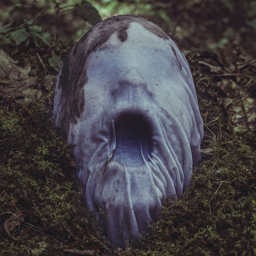

In [3]:
from fastdownload import download_url
dest = 'scary.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'Joyful photos'


/home/adrian/codingProjects/privateGit/machineLearningLesson/lesson1CopyAndEdit/l1CEenv/lib64/python3.11/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


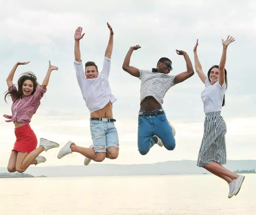

In [4]:
download_url(search_images('Joyful photos', max_images=1)[0], 'joyful.jpg', show_progress=False)
Image.open('joyful.jpg').to_thumb(256,256)

Training directory

In [5]:
searches = 'scary', 'joyful'
path = Path('scary_or_joyful_training')
from time import sleep

for o in searches:
    dest = (path/o) # what is this syntax, never seen it before
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10) # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} real photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} drawn photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)


Searching for 'scary photo'


/home/adrian/codingProjects/privateGit/machineLearningLesson/lesson1CopyAndEdit/l1CEenv/lib64/python3.11/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Searching for 'scary real photo'
Searching for 'scary drawn photo'
Searching for 'joyful photo'
Searching for 'joyful real photo'
Searching for 'joyful drawn photo'


Training

In [8]:
# remove errored images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

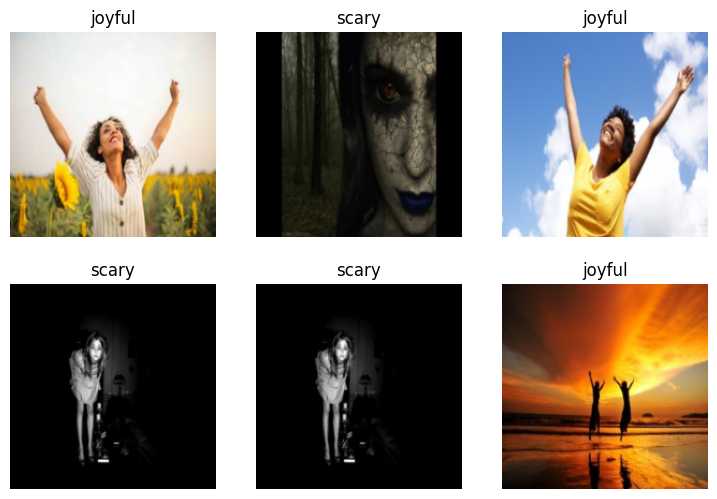

In [10]:
# Separating the data
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.095927,1.075239,0.352941,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.462842,0.125761,0.000000,00:01
1,0.312980,0.103922,0.058824,00:01
2,0.220874,0.088155,0.058824,00:01


Testing

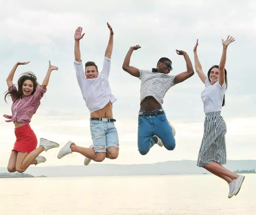

In [12]:
im = Image.open('joyful.jpg')
im.to_thumb(256,256)

In [13]:
is_joy,_,probs = learn.predict(PILImage.create('joyful.jpg'))
print(f"This is a: {is_joy}.")
print(f"Probability it's a joy: {probs[0]:.4f}")

This is a: joyful.
Probability it's a joy: 1.0000


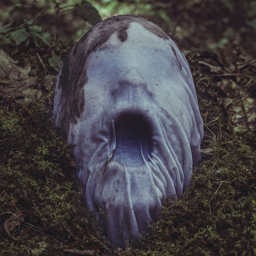

In [15]:
im = Image.open('scary.jpg')
im.to_thumb(256,256)

In [16]:
is_scary,_,probs = learn.predict(PILImage.create('scary.jpg'))
print(f"This is a: {is_scary}.")
print(f"Probability it's a scary: {probs[0]:.4f}")

This is a: scary.
Probability it's a scary: 0.0000


In [18]:
probs[0]

tensor(3.8419e-05)